In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
trainingfile = open('../temp/training_logs.txt','r')
allLines = trainingfile.readlines()

In [3]:
if len(allLines) < 3:
    print("no epochs")

In [4]:
def getEpochDict(allLines):
    epochdic = {}
    epochdic[0] = {}
    epochdic[0]["trainLoss"] = []
    epochdic[0]["trainTop1"] = []
    epochdic[0]["trainTop5"] = []
    epochdic[0]["valTop1"] = []
    epochdic[0]["valTop5"] = []
    epochdic[0]["valLoss"] = []

    currEpoch = 0
    lineNum = 3
    while lineNum < len(allLines):
        if "Epoch" in allLines[lineNum]:
            currEpoch += 1
            if currEpoch not in epochdic:
                epochdic[currEpoch] = {}
                epochdic[currEpoch]["trainLoss"] = []
                epochdic[currEpoch]["valLoss"] = []
                epochdic[currEpoch]["trainTop1"] = []
                epochdic[currEpoch]["trainTop5"] = []
                epochdic[currEpoch]["valTop1"] = []
                epochdic[currEpoch]["valTop5"] = []
        elif "train Loss" in allLines[lineNum]:
            floatList = re.findall("\d+\.\d+", allLines[lineNum])
            floatList = [float(i) for i in floatList]
            epochdic[currEpoch]["trainLoss"].append(floatList[0])
            epochdic[currEpoch]["trainTop1"].append(floatList[1])
            epochdic[currEpoch]["trainTop5"].append(floatList[2])
        elif "val Loss" in allLines[lineNum]:
            floatList = re.findall("\d+\.\d+", allLines[lineNum])
            floatList = [float(i) for i in floatList]
            epochdic[currEpoch]["valLoss"].append(floatList[0])
            epochdic[currEpoch]["valTop1"].append(floatList[1])
            epochdic[currEpoch]["valTop5"].append(floatList[2])    
        lineNum += 1
    return epochdic

In [5]:
def getTotalSteps(epochdic):
    totalsteps = 0
    if len(epochdic.keys()) != 1:
        totalsteps += len(epochdic[0]["trainLoss"])* (len(epochdic.keys()) - 1)
    totalsteps += len(epochdic[len(epochdic.keys()) - 1]["trainLoss"])
    return totalsteps

In [6]:
def getAllLossAndAcc(epochdic):
    listTrainLosses = list(map(lambda tup: tup[1]['trainLoss'] , list(epochdic.items())))
    allTrainLosses = [item for sublist in listTrainLosses for item in sublist]
    
    listTraintop1 = list(map(lambda tup: tup[1]['trainTop1'] , list(epochdic.items())))
    allTrainTop1 = [item for sublist in listTraintop1 for item in sublist]
    
    listTraintop5 = list(map(lambda tup: tup[1]['trainTop5'] , list(epochdic.items())))
    allTrainTop5 = [item for sublist in listTraintop5 for item in sublist]
    
    listValLosses = list(map(lambda tup: tup[1]['valLoss'] , list(epochdic.items())))
    allValLosses = [item for sublist in listValLosses for item in sublist]
    
    listValtop1 = list(map(lambda tup: tup[1]['valTop1'] , list(epochdic.items())))
    allValTop1 = [item for sublist in listValtop1 for item in sublist]
    
    listValtop5 = list(map(lambda tup: tup[1]['valTop5'] , list(epochdic.items())))
    allValTop5 = [item for sublist in listValtop5 for item in sublist]
    return allTrainLosses, allTrainTop1, allTrainTop5, allValLosses, allValTop1, allValTop5

In [7]:
epochdict = getEpochDict(allLines)
totalsteps = getTotalSteps(epochdict)
allTrainLosses, allTrainTop1, allTrainTop5, allValLosses, allValTop1, allValTop5 = getAllLossAndAcc(epochdict)

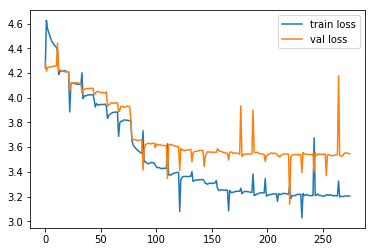

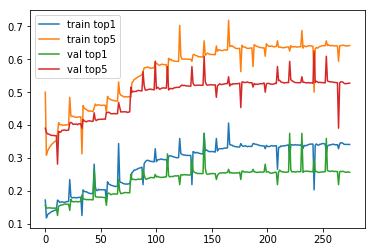

In [9]:
stepaxis = np.arange(totalsteps)
plt.plot(stepaxis, allTrainLosses, label='train loss')
plt.plot(stepaxis, allValLosses, label='val loss')
plt.legend()
plt.show()

plt.plot(stepaxis, allTrainTop1, label='train top1')
plt.plot(stepaxis, allTrainTop5, label = 'train top5')
plt.plot(stepaxis, allValTop1, label='val top1')
plt.plot(stepaxis, allValTop5, label='val top5')
plt.legend()
plt.show()